## Exploring the Data

In [1]:
import pandas as pd
import geopandas as gpd




In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
path = '../data/consolidated/'
weather_data = pd.read_csv(path+'consolidated_weather_from_centroids.csv')
columns = list(weather_data.columns)
columns[0] = 'Hour'
weather_data.columns = columns

In [4]:
weather_data.head()

,Hour,valid_time,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file
0,0,2003-01-01 00:00:00,4.169556,-1.214157,259.06860,262.64050,0.0,1.907349e-06,48.75,-82.0,Northeast_centroid_weather
1,1,2003-01-01 01:00:00,4.098358,-1.437256,259.24854,262.53380,0.0,9.536743e-07,48.75,-82.0,Northeast_centroid_weather
2,2,2003-01-01 02:00:00,4.197708,-1.892502,258.54254,261.63712,0.0,3.814697e-06,48.75,-82.0,Northeast_centroid_weather
3,3,2003-01-01 03:00:00,3.741165,-2.575897,255.86873,258.89398,0.0,8.583069e-06,48.75,-82.0,Northeast_centroid_weather
4,4,2003-01-01 04:00:00,3.124802,-2.671005,255.42903,258.67328,0.0,9.536743e-06,48.75,-82.0,Northeast_centroid_weather


Checking if the centroids fall in the shape map.

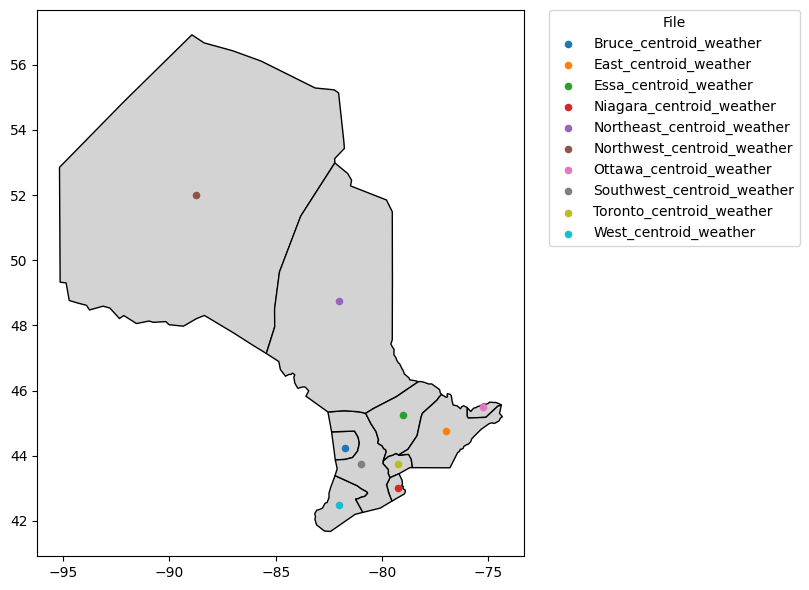

In [5]:
import matplotlib.pyplot as plt
import geopandas as gpd

# read data
shapemap = gpd.read_file('../data/tenzones_ieso.geojson')
centroids = weather_data[['longitude', 'latitude', 'file']].drop_duplicates()

fig, ax = plt.subplots(figsize=(8, 6))

# plot map
shapemap.plot(ax=ax, color='lightgrey', edgecolor='black')

# plot centroids by file
for file_name, group in centroids.groupby('file'):
    ax.scatter(
        group['longitude'],
        group['latitude'],
        s=20,
        label=file_name
    )

# legend **outside** to the right
ax.legend(
    title="File",
    bbox_to_anchor=(1.05, 1),   # x, y position relative to the axes
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()


In [6]:
# now read demand data
demand_data = pd.read_csv(path+'consolidatedIESOdemand.csv')

/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_35170/156424210.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  demand_data = pd.read_csv(path+'consolidatedIESOdemand.csv')


In [7]:
demand_data.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year
0,2003-05-01,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163,2003
1,2003-05-01,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100,2003
2,2003-05-01,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123,2003
3,2003-05-01,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89,2003
4,2003-05-01,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78,2003


In [8]:
demand_data.describe()

,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Year
count,196391.000000,196391.000000,196391.000000,196391.000000,196391.000000,196391.000000,196391.000000,196391.000000,196391.000000,196391.000000,196391.000000,196391.000000,196391.000000,196391.000000
mean,12.500059,16151.929411,567.651960,1267.188354,1078.414138,985.035572,5794.731719,953.168989,76.492344,3187.404173,537.019212,1701.064820,16148.173251,2014.029518
std,6.922173,2549.023064,153.313525,175.253739,269.267308,217.778527,1030.032469,215.107297,34.624143,503.256440,108.220405,313.533723,2536.127219,6.476849
min,1.000000,2270.000000,0.000000,-380.000000,0.000000,0.000000,0.000000,-91.000000,-769.000000,0.000000,-4255.000000,-6.000000,0.000000,2003.000000
25%,7.000000,14248.000000,459.000000,1137.000000,885.000000,835.000000,4997.000000,796.000000,52.000000,2812.000000,463.000000,1471.000000,14264.000000,2008.000000
50%,13.000000,16037.000000,529.000000,1256.000000,1052.000000,984.000000,5799.000000,941.000000,74.000000,3171.000000,528.000000,1663.000000,16039.000000,2014.000000
75%,18.500000,17899.000000,632.000000,1385.000000,1250.000000,1136.000000,6475.000000,1092.000000,97.000000,3524.000000,600.000000,1902.000000,17885.000000,2020.000000
max,24.000000,27005.000000,1149.000000,2026.000000,2508.000000,1858.000000,10285.000000,1936.000000,734.000000,7342.000000,1678.000000,3520.000000,26768.000000,2025.000000


# Data Cleaning and Feature Engineering

In [13]:
# convert fromm kelvin to celsius
weather_data['temp_C_t2m'] = weather_data['t2m'] - 273.15

In [15]:
# show average temperatures
pd.set_option('display.float_format', lambda x: '%.9f' % x)
weather_data['temp_C_t2m'].describe()

count   2004720.000000000
mean          6.662419457
std          11.948470872
min         -45.063900000
25%          -1.136880000
50%           7.163570000
75%          16.441212500
max          37.167720000
Name: temp_C_t2m, dtype: float64

In [ ]:
import sys
sys.path.append('../scripts/')
import 
